In [65]:
# [1-1] 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [66]:
# [1-2] 파일 로딩
fish_df = pd.read_csv('../D0307/fish.csv',usecols=[0,1,2])
display(fish_df)

print(fish_df['Species'].value_counts())

Species  Weight  Length
0     Bream   242.0    25.4
1     Bream   290.0    26.3
2     Bream   340.0    26.5
3     Bream   363.0    29.0
4     Bream   430.0    29.0
..      ...     ...     ...
154   Smelt    12.2    12.2
155   Smelt    13.4    12.4
156   Smelt    12.2    13.0
157   Smelt    19.7    14.3
158   Smelt    19.9    15.0

[159 rows x 3 columns]

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64


In [67]:
# Bream Smelt 2개 품종 데이터 추출 
fish_df = fish_df[(fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')]


In [68]:
# 인덱스 리셋
fish_df.reset_index(drop=True, inplace=True)
fish_df.index

RangeIndex(start=0, stop=49, step=1)

In [69]:
# 타겟 컬럼의 object -> int 변환 (인코딩)
from sklearn.preprocessing import LabelEncoder

# 타겟 컬럼의 인코더 생성 
labelEn = LabelEncoder()
labelEn.fit(fish_df['Species'])
print(f'labelEn : {labelEn.classes_}')

# str -> int 인코딩
target_numpy = labelEn.transform(fish_df['Species'])

print(f'target_numpy : {type(target_numpy)}, {target_numpy.shape}, {np.unique(target_numpy)}')


labelEn : ['Bream' 'Smelt']
target_numpy : <class 'numpy.ndarray'>, (49,), [0 1]


In [70]:
# 피쳐 추출 
feature_numpy = fish_df[fish_df.columns[1:]].values 

print(f'target_numpy : {type(feature_numpy)}, {feature_numpy.shape}')

target_numpy : <class 'numpy.ndarray'>, (49, 2)


In [71]:
# [4] 기계학습 준비

# 학습용 테스트용 데이터셋 분리 
from sklearn.model_selection import train_test_split

# 분류 시 무조건 들어가야 함 : stratify=target_numpy (비율을 맞춰줌)
x_train, x_test, y_train, y_test = train_test_split(feature_numpy, target_numpy, random_state=42, stratify=target_numpy)

In [72]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')

x_train : (36, 2), y_train : (36,)
x_test : (13, 2), y_test : (13,)


In [73]:
print(np.unique_counts(y_train))
print(np.unique_counts(y_test))

UniqueCountsResult(values=array([0, 1]), counts=array([26, 10]))
UniqueCountsResult(values=array([0, 1]), counts=array([9, 4]))


In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# StandardScaler : 평균 0, 표준편차 1, 즉 정규분포 따르도록 스케일링 
# 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행함 
scaler = StandardScaler()

scaler.fit(x_train)   

# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(x_train)
test_scaled_X = scaler.transform(x_test)

In [75]:
# [5] 학습 진행 
from sklearn.neighbors import KNeighborsClassifier  # KNN 분류 모델 

KNNcf_model = KNeighborsClassifier()
KNNcf_model.fit(train_scaled_X, y_train)

KNeighborsClassifier()

In [76]:
# score 확인
s1 = KNNcf_model.score(x_train, y_train)
s2 = KNNcf_model.score(x_test, y_test)

s1, s2

(0.7222222222222222, 0.6923076923076923)

In [77]:
# [6] 성능지표 평가 
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report  # 분류와 관련된 모듈


In [78]:
# 예측값 계산 
pre_ = KNNcf_model.predict(x_test)

precision = precision_score(y_test, pre_)
recall = recall_score(y_test, pre_)
f1 = f1_score(y_test, pre_)

precision, recall, f1

c:\Users\knudc\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.0, 0.0, 0.0)

In [79]:
# 분류 성능평가 보고서
classification_report(y_test, pre_, output_dict=True)

c:\Users\knudc\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\knudc\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\knudc\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'0': {'precision': 0.6923076923076923,
  'recall': 1.0,
  'f1-score': 0.8181818181818182,
  'support': 9.0},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0},
 'accuracy': 0.6923076923076923,
 'macro avg': {'precision': 0.34615384615384615,
  'recall': 0.5,
  'f1-score': 0.4090909090909091,
  'support': 13.0},
 'weighted avg': {'precision': 0.47928994082840237,
  'recall': 0.6923076923076923,
  'f1-score': 0.5664335664335665,
  'support': 13.0}}

In [80]:
# 오차행렬
confusion_matrix(y_test, pre_)

array([[9, 0],
       [4, 0]])

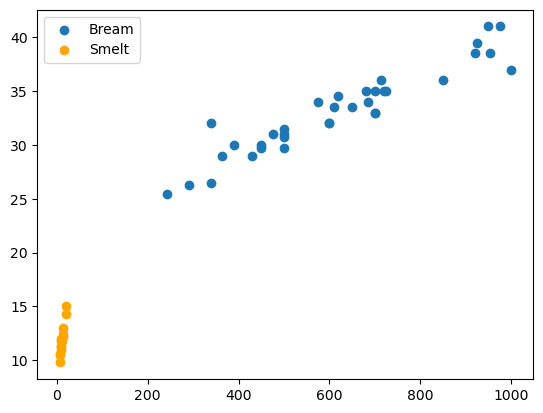

In [81]:
# [7] 예측 및 시각화 
list1 = ['Bream','Smelt']


plt.scatter(fish_df[fish_df['Species'] == 'Bream']['Weight'], fish_df[fish_df['Species'] == 'Bream']['Length'], label='Bream' )
plt.scatter(fish_df[fish_df['Species'] == 'Smelt']['Weight'], fish_df[fish_df['Species'] == 'Smelt']['Length'], label = 'Smelt', color='orange' )
    
plt.legend()
plt.show()

In [82]:
# 임의의 값 지정
new_data = np.array([[150., 24.]])

# 예측하기
pre_data = KNNcf_model.predict(new_data)

# 스칼라(넘파이에서 값이 1개 있는 경우) => 0차원으로 item() 값 추출 
print(pre_data.item())
print(labelEn.classes_[pre_data.item()])

0
Bream


In [83]:
# 예측값 확인 => 친구 찾기
distance, indices = KNNcf_model.kneighbors(new_data)

neighbor_idx = indices.reshape(-1)

neighbor_idx

array([12, 24, 34, 30,  5])

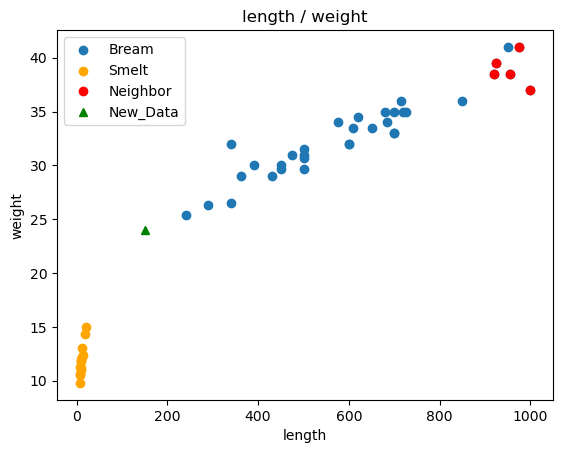

In [84]:
length = fish_df['Length']
weight = fish_df['Weight']
plt.scatter(fish_df[fish_df['Species'] == 'Bream']['Weight'], fish_df[fish_df['Species'] == 'Bream']['Length'], label='Bream' )
plt.scatter(fish_df[fish_df['Species'] == 'Smelt']['Weight'], fish_df[fish_df['Species'] == 'Smelt']['Length'], label = 'Smelt', color='orange' )
plt.plot(x_train[neighbor_idx][:,0], x_train[neighbor_idx][:,1], 'o', color='red', label="Neighbor")
plt.plot(new_data[0][0], new_data[0][1], '^', color='green', label="New_Data")
plt.xlabel('length')
plt.ylabel('weight')
plt.title('length / weight')
plt.legend()
plt.show()

In [85]:
# 이웃들의 분류 확인 
y_train[neighbor_idx]

array([0, 0, 0, 0, 0])